<a href="https://colab.research.google.com/github/GirirajKatoch/CodeMirror/blob/master/Advanced%2520Computer%2520Vision%2520Assignments/Assignment%25202/Advanced_Computer_Vision_Assignment_2_Celebrities_Face_Detection_Traffic_Object_Detection.ipynbAdvanced_Computer_Vision_Assignment_2_Celebrities_Face_Detection_Traffic_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1**

* DOMAIN: Face recognition
* CONTEXT: Company X intends to build a face identification model to recognise human faces.
* DATA DESCRIPTION: The dataset comprises of images and its mask where there is a human face.
* PROJECT OBJECTIVE: Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken
from 'Pinterest' and aligned using dlib library. Some data samples:
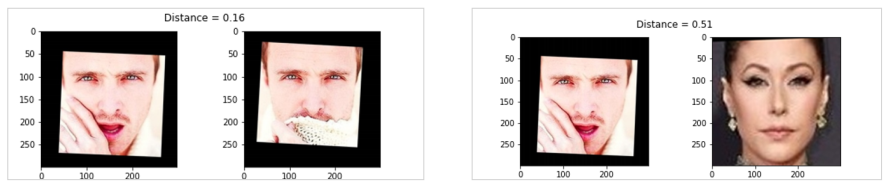

* TASK: In this problem, we use a pre-trained model trained on Face recognition to recognise similar faces. Here, we are particularly
interested in recognising whether two given faces are of the same person or not. Below are the steps involved in the project.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
project_path = '/content/drive/MyDrive/AIML Jupyter Notebooks/Advanced Computer Vision/Assignment 2/'

# 1. Load the dataset and create the metadata.

Unzipping the dataset file 'Dataset Aligned Face Dataset from Pinterest.zip'

In [ ]:
from zipfile import ZipFile
from zipfile import ZipFile
with ZipFile(project_path +'Dataset Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall()
print("Extraction done!")

Extraction done!


Renaming the images and extracting only the person's name

In [ ]:
import numpy as np
import os
from tqdm.notebook import tqdm
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    exts = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
                exts.append(ext)
    return np.array(metadata), exts

metadata, exts = load_metadata('PINS')
labels = np.array([meta.name for meta in metadata])

In [ ]:
metadata

array([PINS/pins_Sundar Pichai/Sundar Pichai108_735.jpg,
       PINS/pins_Sundar Pichai/Sundar Pichai170_692.jpg,
       PINS/pins_Sundar Pichai/Sundar Pichai29_729.jpg, ...,
       PINS/pins_Henry Cavil/Henry Cavil61.jpg,
       PINS/pins_Henry Cavil/Henry Cavil110.jpg,
       PINS/pins_Henry Cavil/Henry Cavil31.jpg], dtype=object)

In [ ]:
metadata.shape

(10770,)

In [ ]:
labels[755]

'pins_Jason Momoa'

In [ ]:
labels.shape

(10770,)

# 2. Check some samples of metadata.

In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

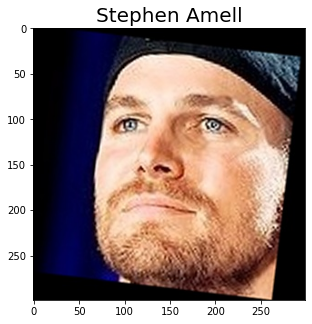

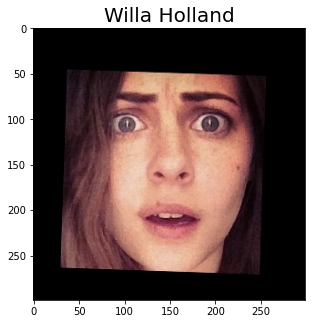

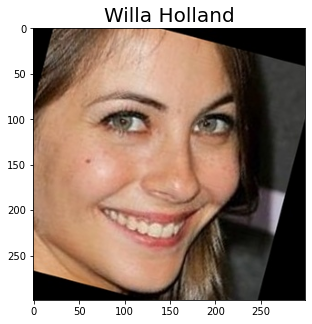

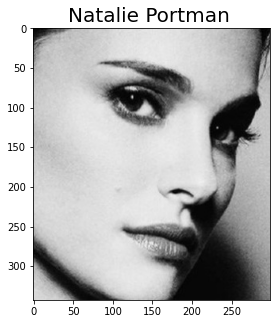

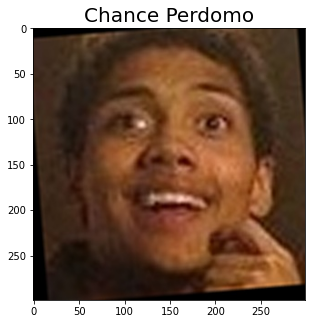

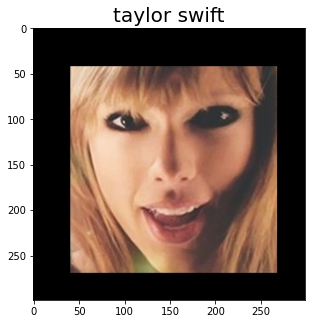

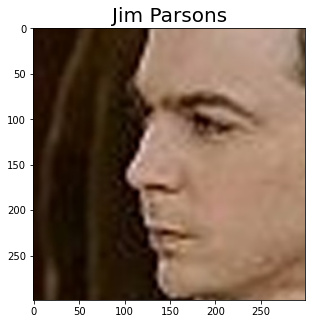

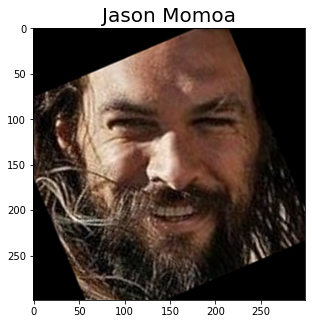

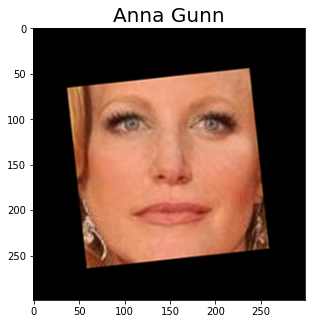

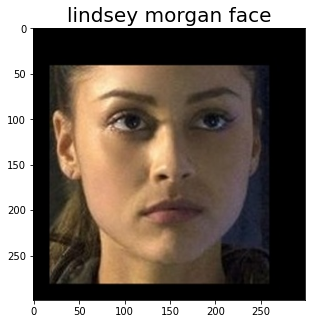

In [90]:
def checkSample(index):
  import matplotlib.pyplot as plt
  img_path = metadata[index].image_path()
  img = load_image(img_path)
  fig = plt.figure(figsize = (10, 5))
  ax = fig.add_subplot(1, 1, 1)
  title = labels[index].split('_')[1]
  ax.set_title(title, fontsize = 20)
  _ = plt.imshow(img)
  return _

checkSample(100)
checkSample(200)
checkSample(300)
checkSample(400)
checkSample(500)
checkSample(600)
checkSample(700)
checkSample(800)
checkSample(900)
checkSample(1000)

# 3. Load the pre-trained model and weights.


Below is a predefined VGG Face model (source: http://www.robots.ox.ac.uk/~vgg/software/vgg_face/ )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

* Load the model defined above
* Load the given weights file named "vgg_face_weights.h5"

In [91]:
model = vgg_face()
model.load_weights('/content/drive/MyDrive/AIML Jupyter Notebooks/Advanced Computer Vision/Assignment 2/vgg_face_weights.h5')

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_13 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_14 (ZeroPadd  (None, 226, 226, 64)     0         
 ing2D)                                                          
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                      

Get vgg_face_descriptor

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

#4. Generate Embedding vectors for each face in the dataset.


* Below code will iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict() and store the same in a list with name embeddings
* If there is any error in reading any image in the dataset, it will fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [ ]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [ ]:
embeddings = []
embeddings = np.zeros((metadata.shape[0], 2622))
for i, meta in tqdm(enumerate(metadata)):
  try:
    image = load_image(str(meta))
    image = (image/255.).astype(np.float32)
    image = cv2.resize(image, (224, 224))
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(image, axis = 0))[0]
  except:
    embeddings[i] = np.zeros(2622)

0it [00:00, ?it/s]

# 5. Build distance metrics for identifying the distance between two given images.
* Consider the distance metric as "Squared L2 distance"
* Squared L2 distance between 2 points ; (x1, y1) and (x2, y2) equals  (x1-x2)^2 + (y1-y2)^2

In [ ]:
def distance_btw_photo(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

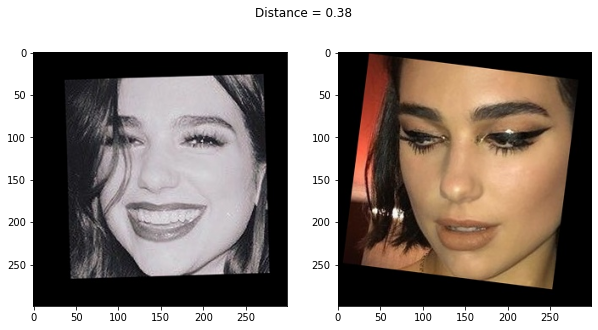

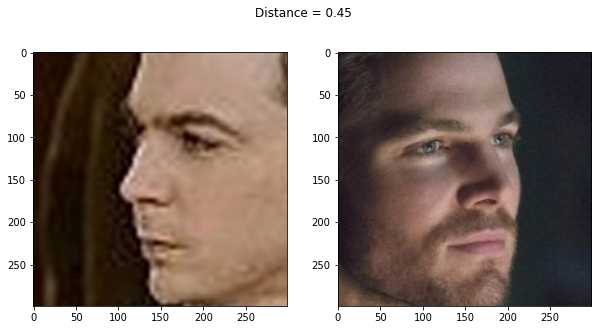

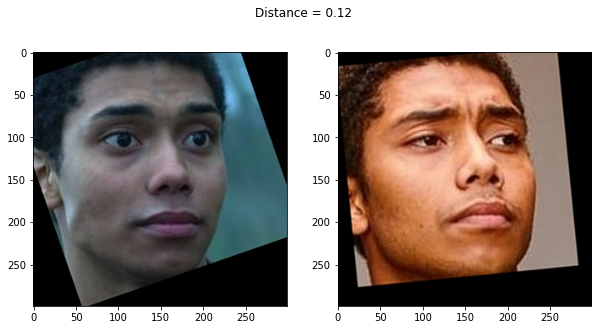

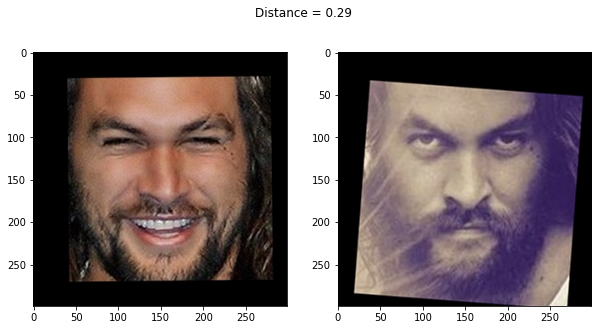

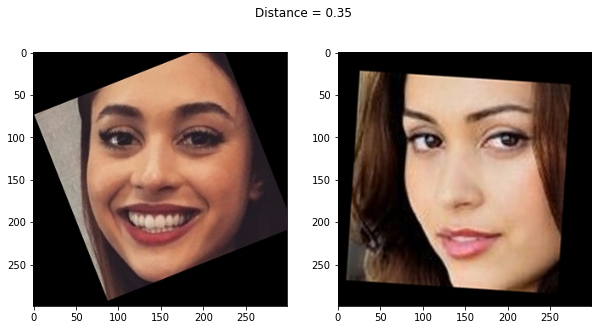

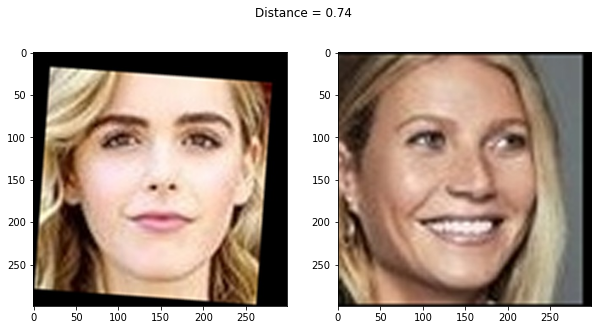

In [62]:
import matplotlib.pyplot as plt

def photo_pair(idx1, idx2):
    plt.figure(figsize=(10,5))
    plt.suptitle(f'Distance = {distance_btw_photo(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

photo_pair(1600, 1601)
photo_pair(700, 180)

photo_pair(530, 531)
photo_pair(750, 754)

photo_pair(999, 998)
photo_pair(1200, 5200)

Creating train and test datasets

* Creating X_train, X_test and y_train, y_test
* Using train_idx to seperate out training features and labels
* Using test_idx to seperate out testing features and labels

In [96]:
train_idx = np.arange(metadata.shape[0]) % 10 != 0     # Send every 10th example into test dataset and rest go into the train dataset
test_idx = np.arange(metadata.shape[0]) % 10 == 0
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9693, 2622)

(1077, 2622)

(9693,)

(1077,)

Encoding Labels using LabelEncoder


In [97]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Standardizing feature values using StandardScaler

In [98]:
# Standarize features
from sklearn.preprocessing import StandardScaler 
SS= StandardScaler()
X_train_ss = SS.fit_transform(X_train)
X_test_ss = SS.transform(X_test)
print(X_train_ss)

[[ 1.31444514  0.35289336 -0.11924883 ...  0.75945098 -0.25690733
  -0.95265968]
 [ 0.49094405  0.1679878  -0.11633154 ...  0.99498744  0.88152898
  -1.66294589]
 [-0.09531254 -0.5923295  -0.01996733 ...  0.21444627 -0.90883909
  -1.30142901]
 ...
 [ 0.30274916 -0.12212518  0.51338282 ... -1.23228491 -0.63243345
  -1.20140559]
 [-0.50598208 -1.15624998 -0.25881908 ... -0.47849936 -1.63231967
  -1.38661555]
 [ 1.90127232  0.27999153  0.6008417  ... -0.49118622 -0.24293269
  -0.18059579]]


# 6. Use PCA for dimensionality reduction.



* Reducing feature dimensions using PCA
* Setting the parameter n_components = 128

In [99]:
from sklearn.decomposition import PCA
n_components = 128
pca = PCA(n_components = n_components, whiten = True)
pca.fit(X_train_ss)
X_train_pca = pca.transform(X_train_ss) 
X_test_pca = pca.transform(X_test_ss)

# 7. Build an SVM classifier to map each image to its right person.

In [102]:
from sklearn.svm import SVC
model_svc= SVC(kernel='linear')
model_svc.fit(X_train_pca, y_train)
print('Accuracy for svc train set: {0:.6f}'.format(model_svc.score(X_train_pca, y_train)))
print('Accuracy for svc test set: {0:.6f}'.format(model_svc.score(X_test_pca, y_test)))

Accuracy for svc train set: 0.999897
Accuracy for svc test set: 0.962860


# 8. Predict using the SVM model.


* Displaying images from test dataset
* Predict to which pims_ folder name in dataset, the image (person's face)    belongs to.

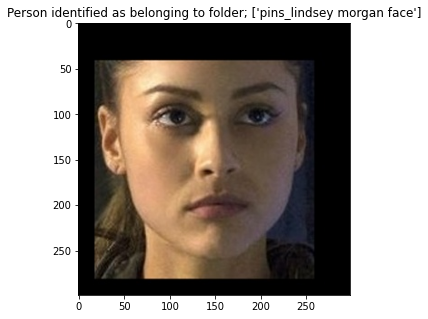

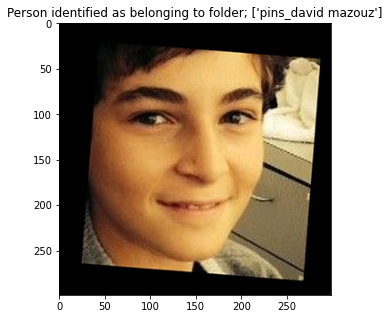

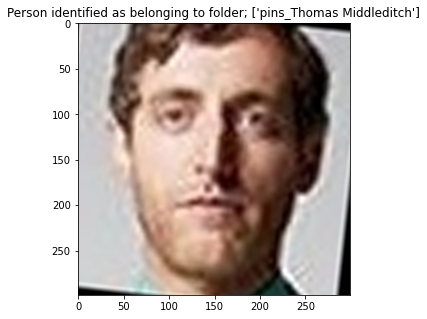

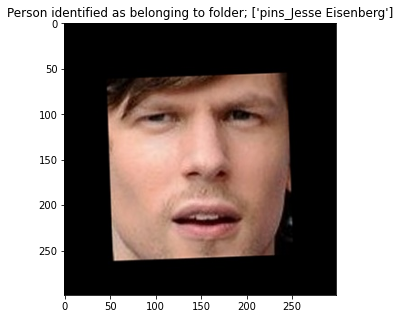

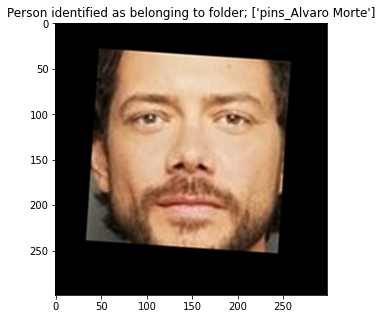

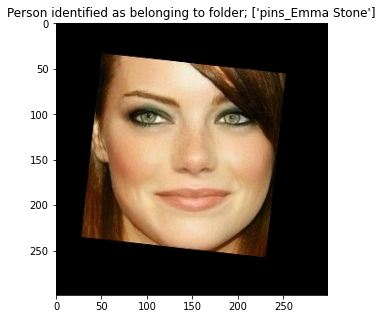

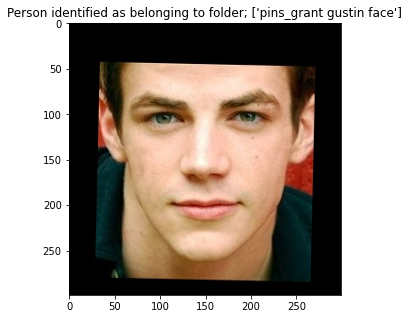

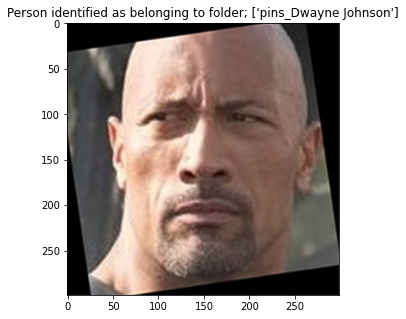

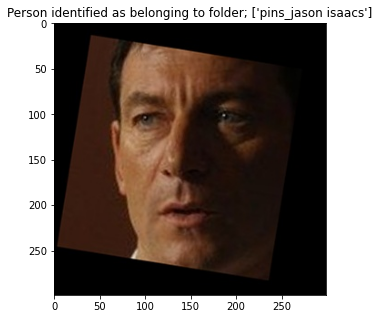

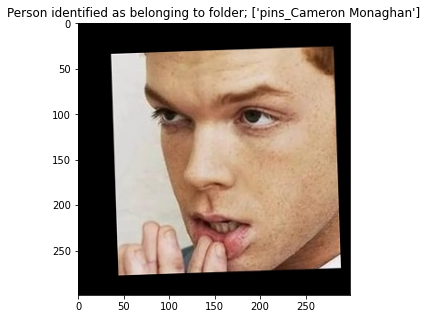

In [119]:
def predictPersonNameFromFace(example_idx,test_idx,model_svc,X_test_pca,le):
    example_image = load_image(metadata[test_idx][example_idx].image_path())
    example_prediction = model_svc.predict([X_test_pca[example_idx]])
    example_identity =  le.inverse_transform(example_prediction)
    plt.figure(figsize = (10, 5))
    plt.imshow(example_image)
    plt.title(f'Person identified as belonging to folder; {example_identity}');

predictPersonNameFromFace(100,test_idx,model_svc,X_test_pca,le)
predictPersonNameFromFace(200,test_idx,model_svc,X_test_pca,le)
predictPersonNameFromFace(300,test_idx,model_svc,X_test_pca,le)
predictPersonNameFromFace(400,test_idx,model_svc,X_test_pca,le)
predictPersonNameFromFace(500,test_idx,model_svc,X_test_pca,le)
predictPersonNameFromFace(600,test_idx,model_svc,X_test_pca,le)
predictPersonNameFromFace(700,test_idx,model_svc,X_test_pca,le)
predictPersonNameFromFace(800,test_idx,model_svc,X_test_pca,le)
predictPersonNameFromFace(900,test_idx,model_svc,X_test_pca,le)
predictPersonNameFromFace(1000,test_idx,model_svc,X_test_pca,le)

# **Part 2**

* DOMAIN: State traffic department
* CONTEXT: City X’s traffic department wants to understand the traffic density on road during busy hours in order to efficiently program
their traffic lights.
* TASK: Create an automation using computer vision to impute dynamic bounding boxes to locate cars or vehicles on the road. It would
require for you to do some research on how to impute bounding boxes on video file. You can use video provided with this assignment or
any video of your choice which has moving cars to impute bounding boxes.
Refer to the screenshot from sample video below:
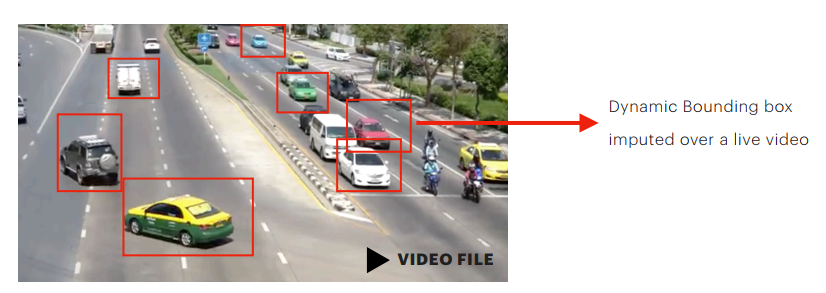

In [3]:
# Import Libraries
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
np.random.seed(42)

In [4]:
# Define a routine to fix a color issue to ensure colors are seen correctly in matplotlib 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [6]:
from IPython.display import HTML
# Input Video file 
videoFile = project_path + 'trafficvideo.mp4'
# Below is the youtube video from where the above input video file has been downloaded.
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/nt3D26lrkho" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


Extracting the background in video.

In [7]:
video_stream = cv2.VideoCapture(videoFile)

# Randomly select 30 frames
frameIds = video_stream.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=30)

# Store selected frames in an array
frames = []
for fid in frameIds:
    video_stream.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = video_stream.read()
    frames.append(frame)
    
video_stream.release()

Calculating median and average for saved frames. Median is used since it removes outliers more effectively.

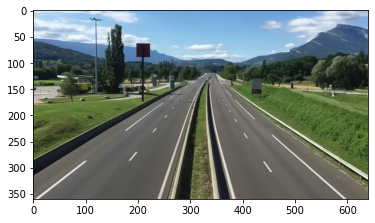

In [8]:
# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)
plt.imshow(fixColor(medianFrame))

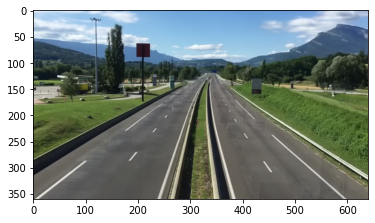

In [9]:
# Calculate the average along the time axis
avgFrame = np.average(frames, axis=0).astype(dtype=np.uint8)
plt.imshow(fixColor(avgFrame))

**Processing a frame**

Considering first frame from the frames array, that contains a few moving cars.

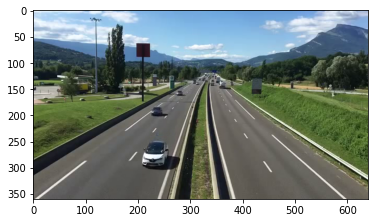

In [10]:
sample_frame=frames[0]
plt.imshow(fixColor(sample_frame))

Moving objects can be identitied with grayscale images. Hence , converting both the median and sample image to grayscale

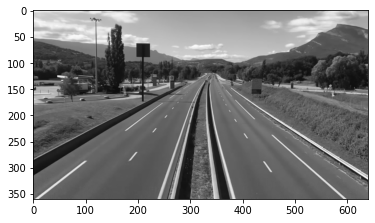

In [11]:
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(grayMedianFrame))

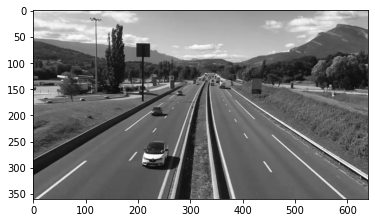

In [12]:
graySample=cv2.cvtColor(sample_frame, cv2.COLOR_BGR2GRAY)
plt.imshow(fixColor(graySample))

**Remove background**

* Remove the background from the sample image.
* Illuminated images of cars with the background removed is generated 

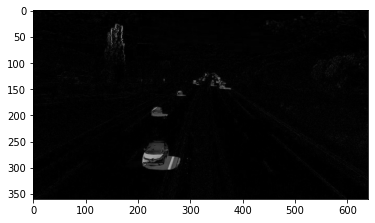

In [13]:
dframe = cv2.absdiff(graySample, grayMedianFrame)
plt.imshow(fixColor(dframe))

**Blurring**

Gaussian blurring is being applied to reduce noise and enable easier identification of edges

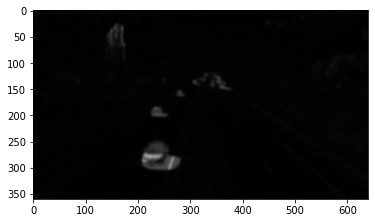

In [14]:
blurred = cv2.GaussianBlur(dframe, (11,11), 0)
plt.imshow(fixColor(blurred))

**Thresholding**
* Threshold is being run to clearly bring out the objects left in the image. 
* OTSU thresholding is used which automatically figures out the correct thresold levels.

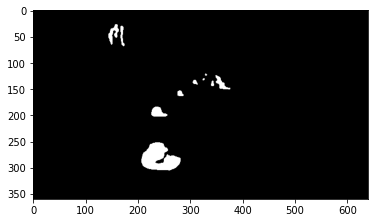

In [15]:
ret, tframe= cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(fixColor(tframe))

**Contour and Bounding Boxes**

Creating contours using the thresholded pictures

In [16]:
(cnts, _) = cv2.findContours(tframe.copy(), cv2.RETR_EXTERNAL, 
                             cv2 .CHAIN_APPROX_SIMPLE)

Creating bounding boxes for the contours identified above and show the same on the sample images

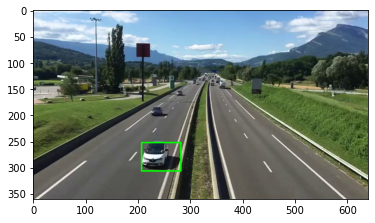

In [17]:
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    if y > 200:  # Disregard items at the top of the images
       cv2.rectangle(sample_frame,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(fixColor(sample_frame))

**Processing final video**

* Declareing the output video to be generated with bounding boxes. 
* Using CV2 to create an MP4 video of 30 fps with a resolution of 
640*480

In [18]:
writer = cv2.VideoWriter(project_path + "trafficvideoOutput.mp4", 
                         cv2.VideoWriter_fourcc(*"MP4V"), 30,(640,480))

In [19]:
#Create a new video stream and get total frame count
video_stream = cv2.VideoCapture(videoFile)
total_frames=video_stream.get(cv2.CAP_PROP_FRAME_COUNT)
total_frames

1740.0

In [20]:
frameCnt=0
while(frameCnt < total_frames-1):

    frameCnt+=1
    ret, frame = video_stream.read()

    # Convert current frame to grayscale
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Calculate absolute difference of current frame and
    # the median frame
    dframe = cv2.absdiff(gframe, grayMedianFrame)
    # Gaussian
    blurred = cv2.GaussianBlur(dframe, (11, 11), 0)
    #Thresholding to binarise
    ret, tframe= cv2.threshold(blurred,0,255,
                               cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #Identifying contours from the threshold
    (cnts, _) = cv2.findContours(tframe.copy(), 
                                 cv2.RETR_EXTERNAL, cv2 .CHAIN_APPROX_SIMPLE)
    #For each contour draw the bounding bos
    for cnt in cnts:
        x,y,w,h = cv2.boundingRect(cnt)
        if y > 200: # Disregard items in the top of the picture
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    writer.write(cv2.resize(frame, (640,480)))
 
#Release video object
video_stream.release()
writer.release()

The final video file generated with bounding boxes around moving vehicles on the two roads is viewable below

In [29]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wm9C4qZdcRo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
  

In [33]:
!jupyter nbconvert --to html "/content/drive/MyDrive/AIML Jupyter Notebooks/Advanced Computer Vision/Assignment 2/Advanced_Computer_Vision_Assignment_2_Celebrities_Face_Detection_Traffic_Object_Detection.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/AIML Jupyter Notebooks/Advanced Computer Vision/Assignment 2/Advanced_Computer_Vision_Assignment_2_Celebrities_Face_Detection_Traffic_Object_Detection.ipynb to html
[NbConvertApp] Writing 5420188 bytes to /content/drive/MyDrive/AIML Jupyter Notebooks/Advanced Computer Vision/Assignment 2/Advanced_Computer_Vision_Assignment_2_Celebrities_Face_Detection_Traffic_Object_Detection.html
